# 1D FEM: Symbolic Computation of Elementary Stiffness and Mass Matrix 

In [1]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
import matplotlib.pyplot as plt

Succesfully imported numpy -- Version: 1.21.6
Succesfully imported scipy -- Version: 1.7.3
Succesfully imported sympy -- Version: 1.8


## Section 1/: 1D Linear Shape Function

### Assume element length 1 and thus no scaling with mesh width

In [2]:
sym.var('x')
phi1 = 1-x
phi2 = x
phi = sym.Matrix([phi1, phi2])
dphi = sym.diff(phi, x)
A = sym.integrate(dphi*sym.Transpose(dphi), (x, 0.,1))
M = sym.integrate(phi*sym.Transpose(phi), (x, 0.,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

contribution to the stiffness matrix
⎡1   -1⎤
⎢      ⎥
⎣-1  1 ⎦
contribution to the mass matrix
⎡1/3  1/6⎤
⎢        ⎥
⎣1/6  1/3⎦


(None, None)

### Assume element length h and thus scaling with h 

contribution to the stiffness matrix
⎡ 1   -1 ⎤
⎢ ─   ───⎥
⎢ h    h ⎥
⎢        ⎥
⎢-1    1 ⎥
⎢───   ─ ⎥
⎣ h    h ⎦
contribution to the mass matrix
⎡h  h⎤
⎢─  ─⎥
⎢3  6⎥
⎢    ⎥
⎢h  h⎥
⎢─  ─⎥
⎣6  3⎦


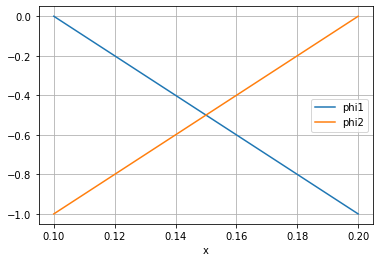

In [8]:
sym.var('x')
sym.var('xl')
sym.var('h')
phi1 = (xl-x)/(h)
phi2 = (x-xl-h)/(h)
phi = sym.Matrix([phi1, phi2])
dphi = sym.diff(phi, x)
A = sym.integrate(dphi*sym.Transpose(dphi), (x, xl, xl+h))
M = sym.integrate(phi*sym.Transpose(phi), (x, xl, xl+h))
print('contribution to the stiffness matrix'), sym.pprint(sym.simplify(A))
print('contribution to the mass matrix'), sym.pprint(sym.simplify(M))

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify((x, xl, h), phi1)
phi2_lambda = sym.lambdify((x, xl, h), phi2)

#..sample the lambda expression for the computed solution 
x1 = 0.1
x2 = 0.2
nsamples = 100 
xvec = np.linspace(x1,x2,nsamples)
phi1_vec = phi1_lambda(xvec,x1,x2-x1)
phi2_vec = phi2_lambda(xvec,x1,x2-x1)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

## Section 2: 1D Quadratic Shape Functions
To plot the basis functions, the symbolic expressions are lambdafied. This currently fails for functions in more variables.

### Assume element length 1 and thus no scaling with mesh width

contribution to the stiffness matrix
⎡2.33333333333333   -2.66666666666667  0.333333333333332⎤
⎢                                                       ⎥
⎢-2.66666666666667        16/3         -2.66666666666667⎥
⎢                                                       ⎥
⎣0.333333333333332  -2.66666666666667  2.33333333333333 ⎦
contribution to the mass matrix
⎡ 0.133333333333333   0.0666666666666673  -0.0333333333333332⎤
⎢                                                            ⎥
⎢0.0666666666666673          8/15         0.0666666666666667 ⎥
⎢                                                            ⎥
⎣-0.0333333333333332  0.0666666666666667   0.133333333333333 ⎦


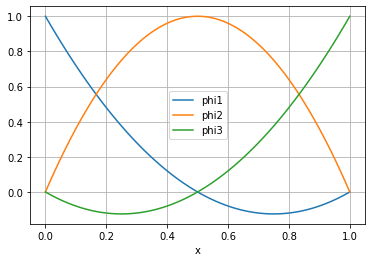

In [4]:
sym.var('x')
phi1 = 2*(1-x)*(0.5-x)
phi2 = 4*x*(1-x)
phi3 = 2*x*(x-0.5)
phi = sym.Matrix([phi1, phi2, phi3])
dphi = sym.diff(phi, x)
A = sym.integrate(dphi*sym.Transpose(dphi), (x, 0.,1))
M = sym.integrate(phi*sym.Transpose(phi), (x, 0.,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify(x, phi1)
phi2_lambda = sym.lambdify(x, phi2)
phi3_lambda = sym.lambdify(x, phi3)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(0,1,nsamples)
phi1_vec = phi1_lambda(xvec)
phi2_vec = phi2_lambda(xvec)
phi3_vec = phi3_lambda(xvec)

#..plot the basis function 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.plot(xvec,phi3_vec,label='phi3')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

### Assume element length h and thus scaling with h

integral of basis functionbs
⎡ h ⎤
⎢ ─ ⎥
⎢ 6 ⎥
⎢   ⎥
⎢2⋅h⎥
⎢───⎥
⎢ 3 ⎥
⎢   ⎥
⎢ h ⎥
⎢ ─ ⎥
⎣ 6 ⎦
contribution to the stiffness matrix
⎡ 7   -8    1 ⎤
⎢───  ───  ───⎥
⎢3⋅h  3⋅h  3⋅h⎥
⎢             ⎥
⎢-8    16  -8 ⎥
⎢───  ───  ───⎥
⎢3⋅h  3⋅h  3⋅h⎥
⎢             ⎥
⎢ 1   -8    7 ⎥
⎢───  ───  ───⎥
⎣3⋅h  3⋅h  3⋅h⎦
contribution to the mass matrix
⎡2⋅h  h    -h ⎤
⎢───  ──   ───⎥
⎢ 15  15    30⎥
⎢             ⎥
⎢h    8⋅h  h  ⎥
⎢──   ───  ── ⎥
⎢15    15  15 ⎥
⎢             ⎥
⎢-h   h    2⋅h⎥
⎢───  ──   ───⎥
⎣ 30  15    15⎦


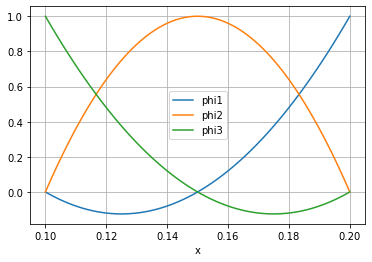

In [7]:
sym.var('x')
sym.var('xl')
sym.var('h')
phi1 = (xl-x)*(xl+h/2-x)/(h*h/2)
phi2 = (xl-x)*(x-xl-h)/(h*h/4)
phi3 = (x-xl-h)*(x-xl-h/2)/(h*h/2)
phi = sym.Matrix([phi1, phi2, phi3])
dphi = sym.diff(phi, x)
iphi = sym.integrate(phi, (x, xl, xl+h))
A = sym.integrate(dphi*sym.Transpose(dphi), (x, xl, xl+h))
M = sym.integrate(phi*sym.Transpose(phi), (x, xl, xl+h))
print('integral of basis functionbs'), sym.pprint(sym.simplify(iphi))
print('contribution to the stiffness matrix'), sym.pprint(sym.simplify(A))
print('contribution to the mass matrix'), sym.pprint(sym.simplify(M))

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify((x, xl, h), phi1)
phi2_lambda = sym.lambdify((x, xl, h), phi2)
phi3_lambda = sym.lambdify((x, xl, h), phi3)

#..sample the lambda expression for the computed solution 
x1 = 0.1
x2 = 0.2
nsamples = 100 
xvec = np.linspace(x1,x2,nsamples)
phi1_vec = phi1_lambda(xvec,x1,x2-x1)
phi2_vec = phi2_lambda(xvec,x1,x2-x1)
phi3_vec = phi3_lambda(xvec,x1,x2-x1)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.plot(xvec,phi3_vec,label='phi3')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

## Section 3:/ Linear Triangular Elements 

In [73]:
sym.var('x')
sym.var('y')
phi1 = 1-x-y
phi2 = x
phi3 = y
phi  = sym.Matrix([phi1, phi2, phi3])
phi2 = phi*sym.Transpose(phi)
dxphi = sym.diff(phi, x)
dyphi = sym.diff(phi, y)
gradphi2 = dxphi*sym.Transpose(dxphi) + dyphi*sym.Transpose(dyphi) 
A = sym.integrate(sym.integrate(gradphi2,(x,0,1-y)),(y,0,1))
M = sym.integrate(sym.integrate(phi2,(x,0,1-y)),(y,0,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

contribution to the stiffness matrix
⎡ 1    -1/2  -1/2⎤
⎢                ⎥
⎢-1/2  1/2    0  ⎥
⎢                ⎥
⎣-1/2   0    1/2 ⎦
contribution to the mass matrix
⎡1/12  1/24  1/24⎤
⎢                ⎥
⎢1/24  1/12  1/24⎥
⎢                ⎥
⎣1/24  1/24  1/12⎦


(None, None)

## Section 4:/ Quadratic Triangular Elements 
See [Slides FEM Basis Functions](https://www.geophysik.uni-muenchen.de/~igel/Lectures/NMG/08_finite_elements_basisfunctions.pdf).

In [75]:
sym.var('x')
sym.var('y')
phi1 = (1-x-y)*(1-2*x-2*y)
phi2 = x*(2*x-1)
phi3 = y*(2*y-1)
phi4 = 4*x*(1-x-y)
phi5 = 4*x*y
phi6 = 4*y*(1-x-y)
phi  = sym.Matrix([phi1, phi2, phi3, phi4, phi5, phi6])
phi2 = phi*sym.Transpose(phi)
dxphi = sym.diff(phi, x)
dyphi = sym.diff(phi, y)
gradphi2 = dxphi*sym.Transpose(dxphi) + dyphi*sym.Transpose(dyphi) 
A = sym.integrate(sym.integrate(gradphi2,(x,0,1-y)),(y,0,1))
M = sym.integrate(sym.integrate(phi2,(x,0,1-y)),(y,0,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

contribution to the stiffness matrix
⎡ 1    1/6   1/6   -2/3   0    -2/3⎤
⎢                                  ⎥
⎢1/6   1/2    0    -2/3   0     0  ⎥
⎢                                  ⎥
⎢1/6    0    1/2    0     0    -2/3⎥
⎢                                  ⎥
⎢-2/3  -2/3   0    8/3   -4/3   0  ⎥
⎢                                  ⎥
⎢ 0     0     0    -4/3  8/3   -4/3⎥
⎢                                  ⎥
⎣-2/3   0    -2/3   0    -4/3  8/3 ⎦
contribution to the mass matrix
⎡ 1/60   -1/360  -1/360    0    -1/90    0  ⎤
⎢                                           ⎥
⎢-1/360   1/60   -1/360    0      0    -1/90⎥
⎢                                           ⎥
⎢-1/360  -1/360   1/60   -1/90    0      0  ⎥
⎢                                           ⎥
⎢  0       0     -1/90   4/45   2/45   2/45 ⎥
⎢                                           ⎥
⎢-1/90     0       0     2/45   4/45   2/45 ⎥
⎢                                           ⎥
⎣  0     -1/90     0     2/45   2/45   4/45 ⎦


(None, None)

## Section 5:/ Quadrilateral Linear Elements 

In [76]:
sym.var('x')
sym.var('y')
phi1 = (1-x)*(1-y)
phi2 = (1-x)*y
phi3 = x*y
phi4 = x*(1-y)
phi  = sym.Matrix([phi1, phi2, phi3, phi4])
phi2 = phi*sym.Transpose(phi)
dxphi = sym.diff(phi, x)
dyphi = sym.diff(phi, y)
gradphi2 = dxphi*sym.Transpose(dxphi) + dyphi*sym.Transpose(dyphi) 
A = sym.integrate(sym.integrate(gradphi2,(x,0,1)),(y,0,1))
M = sym.integrate(sym.integrate(phi2,(x,0,1)),(y,0,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

contribution to the stiffness matrix
⎡2/3   -1/6  -1/3  -1/6⎤
⎢                      ⎥
⎢-1/6  2/3   -1/6  -1/3⎥
⎢                      ⎥
⎢-1/3  -1/6  2/3   -1/6⎥
⎢                      ⎥
⎣-1/6  -1/3  -1/6  2/3 ⎦
contribution to the mass matrix
⎡1/9   1/18  1/36  1/18⎤
⎢                      ⎥
⎢1/18  1/9   1/18  1/36⎥
⎢                      ⎥
⎢1/36  1/18  1/9   1/18⎥
⎢                      ⎥
⎣1/18  1/36  1/18  1/9 ⎦


(None, None)